In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [5]:
df = df.drop(['date','street', 'city', 'statezip', 'country'], axis=1)

In [6]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

In [7]:
df.describe().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00
mean,551962.99,3.40,2.16,2139.35,14852.52,1.51,0.01,0.24,3.45,1827.27,312.08,1970.79,808.61
std,563834.70,0.91,0.78,963.21,35884.44,0.54,0.08,0.78,0.68,862.17,464.14,29.73,979.41
min,0.00,0.00,0.00,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00
25%,322875.00,3.00,1.75,1460.00,5000.75,1.00,0.00,0.00,3.00,1190.00,0.00,1951.00,0.00
50%,460943.46,3.00,2.25,1980.00,7683.00,1.50,0.00,0.00,3.00,1590.00,0.00,1976.00,0.00
75%,654962.50,4.00,2.50,2620.00,11001.25,2.00,0.00,0.00,4.00,2300.00,610.00,1997.00,1999.00
max,26590000.00,9.00,8.00,13540.00,1074218.00,3.50,1.00,4.00,5.00,9410.00,4820.00,2014.00,2014.00


In [8]:
#price - kaina
#bedrooms - miegamieji
#bathrooms - vonios kambariai
#sqft_living - kvadratinės pėdos gyvenamosios vietos
#sqft_lot - kvadratinės pėdos ploto
#floors - aukštai
#waterfront - vanduo priešakyje
#view - koks vaizdas
#condition - būklė
#sqft_above - kvadratinės pėdos aukščiau žemės
#sqft_basement - kvadratinės pėdos rūsio
#yr_built - pastatymo metai
#yr_renovated - renovavimo metai

In [9]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [10]:
def year_function(yr_built):
    if yr_built <= 1900:
        return "iki 1900"
    elif yr_built <= 1910:
        return "1900-1910"
    elif yr_built <= 1920:
        return "1910-1920"
    elif yr_built <= 1930:
        return "1920-1930"
    elif yr_built <= 1940:
        return "1930-1940"
    elif yr_built <= 1950:
        return "1940-1950"
    elif yr_built <= 1960:
        return "1950-1960"
    elif yr_built <= 1970:
        return "1960-1970"
    elif yr_built <= 1980:
        return "1970-1980"
    elif yr_built <= 1990:
        return "1980-1990"
    elif yr_built <= 2000:
        return "1990-2000"
    elif yr_built <= 2010:
        return "2000-2010"
    elif yr_built <= 2020:
        return "2010-2020"
    else:
        return "2020 +"

In [11]:
df['decade'] = df['yr_built'].apply(year_function) 

In [12]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,decade
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1950-1960
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,1920-1930
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,1960-1970
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,1960-1970
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,1970-1980


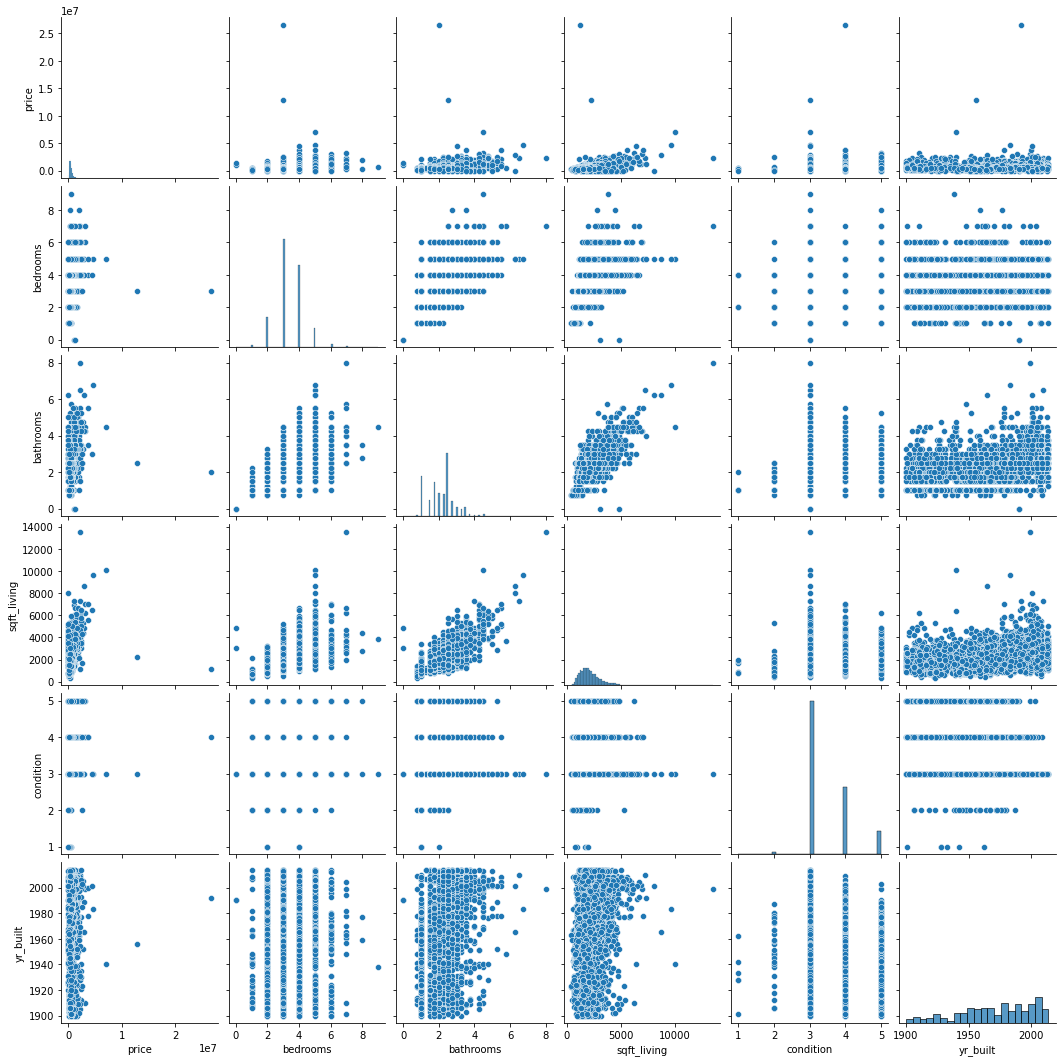

In [13]:
sns.pairplot(data=df,
            vars= ['price','bedrooms', 'bathrooms', 'sqft_living', 'condition', 'yr_built'])

In [46]:
df['renovated'] = (df['yr_renovated'] != 0).astype(int)
df['not_renovated'] = (df['yr_renovated'] == 0).astype(int)


In [40]:
df['price_log'] = np.log(df['price'] + 0.001)


In [16]:
df_filtered = df[df['price'] != 0]


In [17]:
df['price_renovated'] = df.loc[df['yr_renovated'] != 0, 'price']

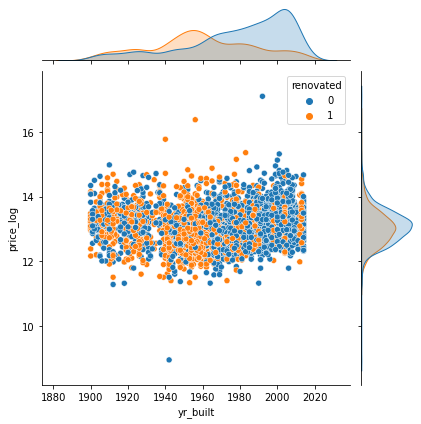

In [18]:
sns.jointplot(x='yr_built', y='price_log', data=df_filtered, hue ='renovated')

<AxesSubplot:xlabel='yr_built'>

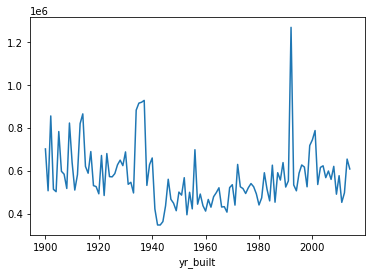

In [19]:
df.groupby('yr_built')['price'].mean().plot()

In [20]:
df_filtered_renovated = df[df['renovated'] != 0]


In [21]:
df_filtered_unrenovated = df[df['renovated'] == 0]


In [22]:
renovated1 = df_filtered_renovated.groupby('decade')['price'].mean()

In [23]:
not_renovated2 = df_filtered_unrenovated.groupby('decade')['price'].mean()

In [24]:
(renovated1-not_renovated2).round(2)

decade
1900-1910     25669.51
1910-1920    -10261.34
1920-1930    -81214.30
1930-1940     62618.02
1940-1950      6044.86
1950-1960     39700.20
1960-1970     -8826.00
1970-1980     29176.19
1980-1990     21524.89
1990-2000   -149931.56
2000-2010     23800.82
2010-2020     24985.04
iki 1900    -732894.74
Name: price, dtype: float64

In [44]:
df['decade'].value_counts().sort_index()

1900-1910    169
1910-1920    155
1920-1930    263
1930-1940    138
1940-1950    386
1950-1960    506
1960-1970    505
1970-1980    480
1980-1990    541
1990-2000    470
2000-2010    773
2010-2020    192
iki 1900      22
Name: decade, dtype: int64

In [25]:
#vidutinė kaina tūkstančiais pagal miegamuosius ir būklę

In [26]:
pd.pivot_table(data = df, index = 'bedrooms', columns = 'condition', values = 'price', aggfunc = 'mean') / 1000

condition,1,2,3,4,5
bedrooms,,,,,
0.0,NaN,NaN,1195.324000,NaN,NaN
1.0,NaN,186.250000,295.085417,230.166667,301.712500
2.0,165.933333,245.641818,394.646765,372.536065,471.713019
3.0,NaN,270.822222,474.103996,500.531951,560.146682
4.0,447.333333,659.166667,642.387465,583.939019,725.114762
5.0,NaN,235.500000,804.544343,712.229493,753.936304
6.0,NaN,305.000000,683.090476,959.169565,929.633333
7.0,NaN,NaN,913.909091,599.000000,2020.000000
8.0,NaN,NaN,340.000000,NaN,1970.000000


In [27]:
#koreliacijos tikrinimas

<AxesSubplot:>

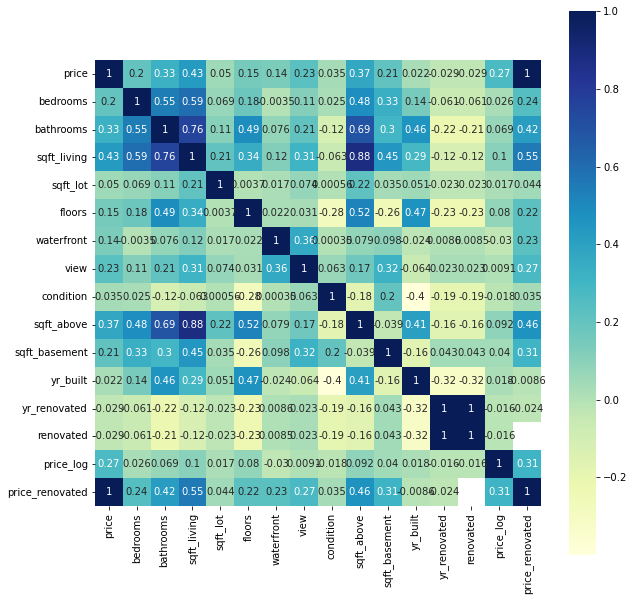

In [28]:
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(df.corr(), annot=True,square = True, cmap="YlGnBu")

In [29]:
y = df['renovated']
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built']

In [30]:
X = df[columns]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 100)

In [32]:
logistic = LogisticRegression()

In [33]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [50]:
coeff_df = pd.DataFrame(logistic.coef_[0], X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
bedrooms,3.842431e-07
bathrooms,-1.238933e-06
sqft_living,-6.056848e-05
sqft_lot,1.198661e-06
floors,-1.046291e-06
waterfront,4.171456e-09
view,4.630099e-07
condition,-1.380405e-06
sqft_above,-3.341929e-04
sqft_basement,2.736244e-04


In [35]:
predictions = logistic.predict(X_test)

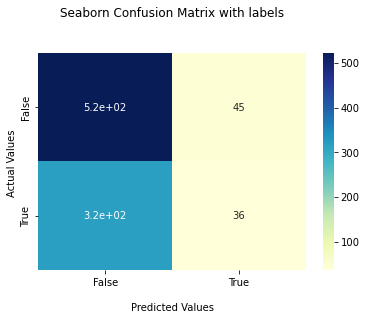

In [42]:
labels = ['True Neg','False Pos','False Neg','True Pos']

labels = np.asarray(labels).reshape(2,2)
cf_matrix = confusion_matrix(y_test, predictions)

ax = sns.heatmap(cf_matrix, annot = True, cmap="YlGnBu")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()



In [37]:
accuracy_score(y_test, predictions)

0.6076086956521739

In [45]:
df['renovated'].count()

4600

In [38]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,decade,renovated,price_log,price_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1950-1960,1,12.653958,313000.0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,1920-1930,0,14.684290,NaN
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,1960-1970,0,12.742566,NaN
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,1960-1970,0,12.948010,NaN
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,1970-1980,1,13.217674,550000.0
